In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import cross_val_score

In [193]:
def load_data():
    train_df = pd.read_csv('train.csv')
    test_df = pd.read_csv('test.csv')
    return train_df, test_df

In [194]:
train_df, test_df = load_data()

In [195]:
train_df.head()

,price,desc,ad_id,location,timestamp,mileage,brand,model,year,fuel,transmission,color,car_type
0,569000,"""เลขไมล์5,700กิโลแท้ 1.3 SP โฉมปัจจุบัน รถ2เดื...",354186401,กรุงเทพมหานคร,1584521455,5700,Mazda,Mazda2 Sport,2020,เบนซิน,เกียร์อัตโนมัติ,เทา,รถเก๋ง
1,1150000,ขาย Chevrolet c10 ปี 1965 รถแท้ ขับขวา พร้อมโอ...,356227846,กรุงเทพมหานคร,1591021387,1234,Chevrolet,รุ่นอื่นๆ,1965,เบนซิน,เกียร์อัตโนมัติ,แดง,รถอื่น ๆ
2,799000,📢มาแว้วว... ลค.ที่ชอบรถสีขาว​ ใสๆเลย\nใครเร็วก...,356055202,นนทบุรี,1590502642,100000,Mitsubishi,Pajero Sport,2016,ดีเซล,เกียร์อัตโนมัติ,ขาว,รถ MPV / SUV
3,429000,รหัส 130/v36\n2010 toyota CAMRY 2.4 hybrid nav...,356169430,กรุงเทพมหานคร,1590844871,184921,Toyota,Camry,2010,ไฮบริด,เกียร์อัตโนมัติ,ดำ,รถเก๋ง
4,268000,เครื่อง 1.2 E โฉมไฟใหม่ พ.พาวเวอร์ ก.ไฟฟ้า ซทล...,354415016,กรุงเทพมหานคร,1585546785,103000,Nissan,Almera,2016,เบนซิน,เกียร์อัตโนมัติ,ขาว,รถเก๋ง


In [196]:
test_df.head()

,price,desc,ad_id,location,timestamp,mileage,brand,model,year,fuel,transmission,color,car_type
0,549000,"Option: เครื่องเล่น CD, USB, กระจกไฟฟ้า, เซ็นท...",354696215,นนทบุรี,1586421506,31200,Ford,Ranger,2017,ดีเซล,เกียร์อัตโนมัติ,ดำ,รถกระบะ
1,358000,ขายรถบ้าน 2006 ISUZU MU-7 แรงๆๆ (เงินสดลดได้)\...,354237756,สมุทรปราการ,1584748598,267000,Isuzu,MU-7,2006,ดีเซล,เกียร์อัตโนมัติ,บรอนซ์เงิน,รถ MPV / SUV
2,529000,🔥แคปเปิดได้ 🔥รุ่นใหม่ล่าสุด 🔥แรง ประหยัด เครื่...,352545121,กรุงเทพมหานคร,1577353632,8,Toyota,Hilux Revo,2019,ดีเซล,เกียร์ธรรมดา,ขาว,รถกระบะ
3,1135000,TOYOTA NEW FORTUNER 2.8 V 4WD SUV AUTO ปี 2015...,356194406,เชียงใหม่,1590918420,100000,Toyota,Fortuner,2015,ดีเซล,เกียร์อัตโนมัติ,ขาว,รถ MPV / SUV
4,469000,💢 ออกรถ 999 บ. 💢\n#ฟรี#ออกรถพร้อมประกันตัวรถ 1...,355315874,นนทบุรี,1588235606,NaN,Toyota,Hilux Vigo,2015,ดีเซล,เกียร์ธรรมดา,เทา,รถกระบะ


In [197]:
#BRAND_SCORE
scaler = StandardScaler()
scaled_score = scaler.fit_transform(train_df.groupby('brand').mean()['price'].values.reshape(-1, 1)).ravel()
brand_score = pd.DataFrame()
brand_score['brand'] = train_df.groupby('brand').mean()['price'].index
brand_score['score'] = scaled_score
brand_score.head()

,brand,score
0,Audi,1.221755
1,BMW,0.451077
2,Chevrolet,-0.552795
3,Ford,-0.512283
4,Honda,-0.521083


In [198]:
#MODEL_SCORE
scaler = StandardScaler()
scaled_score = scaler.fit_transform(train_df.groupby('model').mean()['price'].values.reshape(-1, 1)).ravel()
model_score = pd.DataFrame()
model_score['model'] = train_df.groupby('model').mean()['price'].index
model_score['score2'] = scaled_score
model_score.head()

,model,score2
0,121,-0.497381
1,190,-0.472489
2,200,0.006579
3,200 SX,-0.189060
4,220,-0.147856


In [199]:
train_df['brand']+'/'+train_df['model']

0            Mazda/Mazda2 Sport
1           Chevrolet/รุ่นอื่นๆ
2       Mitsubishi/Pajero Sport
3                  Toyota/Camry
4                 Nissan/Almera
                 ...           
7098      Mercedes-Benz/E-Class
7099          Mitsubishi/Triton
7100                     BMW/X1
7101                 Honda/BR-V
7102             Toyota/Alphard
Length: 7103, dtype: object

In [200]:
#LOCATION_SCORE
scaler = StandardScaler()

# Data Cleaning (missing values, outlier)

In [201]:
def clean_data(df):
    clean = df.copy()
    
    # CLEAN MILEAGE
    def fix_(x):
        try:
            x = int(x)
        except:
            x = np.nan
        return x
    clean['mileage'] = clean['mileage'].apply(lambda x: fix_(x))    
    
    # FILL MISSING VALUES
    transmission_mode = clean['transmission'].mode()
    color_mode = clean['color'].mode()
    clean['desc'] = clean['desc'].fillna('')     
    clean['transmission'] = clean['transmission'].fillna(transmission_mode)
    clean['color'] = clean['color'].fillna(color_mode)
    clean['mileage'] = clean['mileage'].fillna(clean['mileage'].mode()[0])
    return clean

In [202]:
train_data = clean_data(train_df)
test_data = clean_data(test_df)

In [203]:
train_data.head()

,price,desc,ad_id,location,timestamp,mileage,brand,model,year,fuel,transmission,color,car_type
0,569000,"""เลขไมล์5,700กิโลแท้ 1.3 SP โฉมปัจจุบัน รถ2เดื...",354186401,กรุงเทพมหานคร,1584521455,5700.0,Mazda,Mazda2 Sport,2020,เบนซิน,เกียร์อัตโนมัติ,เทา,รถเก๋ง
1,1150000,ขาย Chevrolet c10 ปี 1965 รถแท้ ขับขวา พร้อมโอ...,356227846,กรุงเทพมหานคร,1591021387,1234.0,Chevrolet,รุ่นอื่นๆ,1965,เบนซิน,เกียร์อัตโนมัติ,แดง,รถอื่น ๆ
2,799000,📢มาแว้วว... ลค.ที่ชอบรถสีขาว​ ใสๆเลย\nใครเร็วก...,356055202,นนทบุรี,1590502642,100000.0,Mitsubishi,Pajero Sport,2016,ดีเซล,เกียร์อัตโนมัติ,ขาว,รถ MPV / SUV
3,429000,รหัส 130/v36\n2010 toyota CAMRY 2.4 hybrid nav...,356169430,กรุงเทพมหานคร,1590844871,184921.0,Toyota,Camry,2010,ไฮบริด,เกียร์อัตโนมัติ,ดำ,รถเก๋ง
4,268000,เครื่อง 1.2 E โฉมไฟใหม่ พ.พาวเวอร์ ก.ไฟฟ้า ซทล...,354415016,กรุงเทพมหานคร,1585546785,103000.0,Nissan,Almera,2016,เบนซิน,เกียร์อัตโนมัติ,ขาว,รถเก๋ง


# Feature Engineering

In [204]:
def extract_feature(df):
    feat = df.copy()
    
    #  TIMESTAMP
    feat['timestamp'] = feat['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))
    # NEW NEW TIMESTAMP_YEAR COLUMNS
    feat['timestamp_year'] = feat['timestamp'].apply(lambda x: x.year)
    # CAR AGE COLUMNS
    feat['age'] = feat['timestamp_year'] - feat['year']
    feat = feat[feat['age']>=0]
    
    # CLEAR MILEAGE OUTLIER, FILL MISSING VALUES
#     q1 = feat['mileage'].quantile(0.25)
#     q3 = feat['mileage'].quantile(0.75)
#     IQR = q3-q1
#     upper_limit = q3+1.5*IQR
#     lower_limit = q1-1.5*IQR
#     outliers = (feat['mileage']>upper_limit) | (feat['mileage']<lower_limit)
#     feat = feat[~outliers]
    
#     nan_rows = feat['mileage'].isna()
#     random_values = feat['mileage'][~nan_rows].values
#     np.random.seed(0)
#     random_mileage = np.random.choice(random_values, replace=True, size = sum(nan_rows))
#     feat.loc[nan_rows, 'mileage'] = random_mileage
        
    # DESCRIPTION LENGTH
    feat['length_desc'] = feat['desc'].apply(lambda x: len(str(x)))
    
    # MILEAGE PER YEAR
    feat['mileage_per_year'] = feat['mileage']/feat['age']
    feat['mileage_per_year'] = feat['mileage_per_year'].apply(lambda x: 0 if (x==np.inf) else x).fillna(0)
    
    #LOCATION
    def sort_location(x):
        if x not in ['กรุงเทพมหานคร']:
            x = 'Other City'
        return x
    feat['location'] = feat['location'].apply(lambda x: sort_location(x))
    
    return feat

In [205]:
train_feature = extract_feature(train_data)
test_feature = extract_feature(test_data)

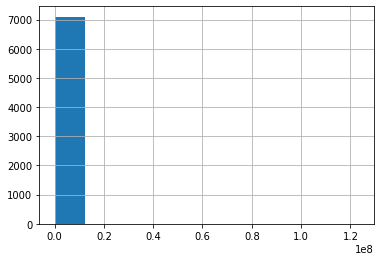

In [206]:
train_feature['mileage'].hist()

In [207]:
# # BRAND SCORE (BE AWARE OF DATA LEAKAGE !!)
# train_feature = pd.merge(train_feature, brand_score, how='inner')
# test_feature = pd.merge(test_feature, brand_score, how='inner')

In [208]:
# MODEL SCORE (BE AWARE OF DATA LEAKAGE !!)
train_feature = pd.merge(train_feature, model_score, how='inner')
test_feature = pd.merge(test_feature, model_score, how='inner')

In [209]:
# NORMALIZE DATA
scaler = MinMaxScaler()
train_feature[['mileage','age','mileage_per_year']] = scaler.fit_transform(train_feature[['mileage','age','mileage_per_year']])
test_feature[['mileage','age','mileage_per_year']] = scaler.transform(test_feature[['mileage','age','mileage_per_year']])

In [210]:
train_feature.head(2)

,price,desc,ad_id,location,timestamp,mileage,brand,model,year,fuel,transmission,color,car_type,timestamp_year,age,length_desc,mileage_per_year,score2
0,569000,"""เลขไมล์5,700กิโลแท้ 1.3 SP โฉมปัจจุบัน รถ2เดื...",354186401,กรุงเทพมหานคร,2020-03-18 15:50:55,0.000046,Mazda,Mazda2 Sport,2020,เบนซิน,เกียร์อัตโนมัติ,เทา,รถเก๋ง,2020,0.000000,469,0.000000,-0.350087
1,366000,รถสวยสีขาวมุกฟรีดาวน์ รถมือแรก เครื่องดีเซล พุ...,354410703,กรุงเทพมหานคร,2020-03-30 07:58:57,0.000577,Mazda,Mazda2 Sport,2016,ดีเซล,เกียร์อัตโนมัติ,ขาว,รถเก๋ง,2020,0.072727,102,0.001247,-0.350087


In [211]:
def get_feature(df, categorical_data, numerical_data):
    get_feat = df.copy()
    get_feat = get_feat[numerical_data + categorical_data]
    #CATEGORICAL DATA
    get_feat = pd.get_dummies(get_feat, columns=categorical_data)
    return get_feat

In [212]:
categorical_data = ['location','car_type']
numerical_data = ['price','mileage','timestamp_year','mileage_per_year','age','score2']
train_feature_ = get_feature(train_feature, categorical_data, numerical_data)
test_feature_ = get_feature(test_feature, categorical_data, numerical_data)

In [213]:
train_feature_

,price,mileage,timestamp_year,mileage_per_year,age,score2,location_Other City,location_กรุงเทพมหานคร,car_type_รถ MPV / SUV,car_type_รถกระบะ,car_type_รถตู้,car_type_รถอื่น ๆ,car_type_รถเก๋ง
0,569000,4.617000e-05,2020,0.000000e+00,0.000000,-0.350087,0,1,0,0,0,0,1
1,366000,5.770278e-04,2020,1.246665e-03,0.072727,-0.350087,0,1,0,0,0,0,1
2,368000,8.100000e-04,2020,1.400000e-03,0.090909,-0.350087,0,1,0,0,0,0,1
3,385000,2.892834e-04,2020,1.249990e-03,0.036364,-0.350087,0,1,0,0,0,0,1
4,369000,3.240000e-04,2020,7.000000e-04,0.072727,-0.350087,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7096,12490000,2.349000e-04,2020,4.060000e-04,0.090909,6.526117,0,1,0,0,0,0,1
7097,1198000,3.969000e-04,2020,4.287500e-04,0.145455,0.137930,1,0,0,0,0,0,1
7098,4990000,1.782000e-03,2020,6.695652e-04,0.418182,2.283166,0,1,0,0,0,0,1
7099,925000,8.100000e-07,2020,8.750000e-07,0.145455,-0.016513,0,1,0,0,0,0,1


# Train Model

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression

In [215]:
X = train_feature_.drop('price', axis=1)
y = train_feature_['price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=101)

In [216]:
X_test = test_feature_.drop('price', axis=1)
y_test = test_feature_['price']

In [217]:
def train_model(X_train, y_train, learning_rate, n_estimators, max_depth):
    model =GradientBoostingRegressor(random_state=0, learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, 
                                    max_features='auto', alpha=0.2)
    model.fit(X_train, y_train)
    return model

In [218]:
model = train_model(X_train, y_train,0.1,100,7)

In [219]:
prediction = model.predict(X_val)

In [220]:
def eval_acc(y_val, prediction):
    acc = mean_squared_error(y_val, prediction)
    acc2 = r2_score(y_val, prediction)
    return (acc, acc2)

In [221]:
def pipeline(learning_rate=0.1, n_estimators=100, max_depth=7):
    model = train_model(X_train, y_train, learning_rate, n_estimators, max_depth)
    prediction = model.predict(X_val)
    acc = eval_acc(y_val, prediction)
    model = train_model(X, y, learning_rate, n_estimators, max_depth)
    prediction = model.predict(X_test)
    acc2 = eval_acc(y_test, prediction)
    
    return acc, acc2, model

In [222]:
acc, acc2, model = pipeline(learning_rate=0.1, n_estimators=250, max_depth=6)
print('Train dataset Validation')
print('RMSE: ', np.sqrt(acc[0]))
print('R-Squared: ', acc[1])
print('-----------------------------------------------')
print('Test dataset Validation')
print('RMSE: ', np.sqrt(acc2[0]))
print('R-Squared: ', acc2[1])

Train dataset Validation
RMSE:  296672.61922355695
R-Squared:  0.7327505275031312
-----------------------------------------------
Test dataset Validation
RMSE:  329904.9539832823
R-Squared:  0.6820315944570787


In [223]:
model2 =GradientBoostingRegressor(random_state=0, learning_rate=0.1, n_estimators=250, max_depth=6)
cross_val_score(model2, X, y, cv=20, scoring='r2').mean()

0.48045444832860473

In [224]:
feat_imp = pd.DataFrame([X_train.columns, model.feature_importances_]).T
feat_imp.columns = ['feature','importance']
feat_imp.sort_values(by='importance', ascending=False)

,feature,importance
4,score2,0.669017
3,age,0.163704
2,mileage_per_year,0.0665918
0,mileage,0.0457148
10,car_type_รถอื่น ๆ,0.0328069
1,timestamp_year,0.00900659
11,car_type_รถเก๋ง,0.00852118
7,car_type_รถ MPV / SUV,0.00166158
5,location_Other City,0.000971933
6,location_กรุงเทพมหานคร,0.00093787


Text(0, 0.5, 'R-Squared')

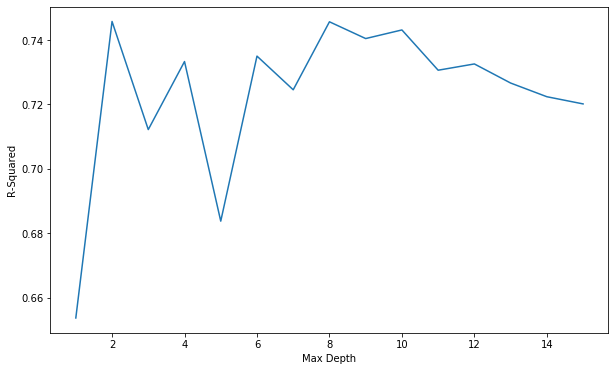

In [225]:
acc_array = []
for i in range(0,15):
    acc, acc2, model = pipeline(learning_rate=0.1, n_estimators=50, max_depth=i+1)
    acc_array.append(acc[1])
plt.figure(figsize=(10,6))
plt.plot(range(1,16), acc_array)
plt.xlabel('Max Depth')
plt.ylabel('R-Squared')

Text(0, 0.5, 'R-Squared')

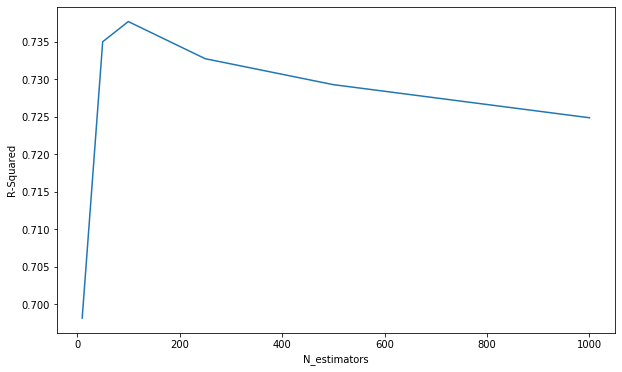

In [226]:
acc_array = []
for i in [10,50,100,250,500,1000]:
    acc, acc2, model = pipeline(learning_rate=0.1, n_estimators=i, max_depth=6)
    acc_array.append(acc[1])
plt.figure(figsize=(10,6))
plt.plot([10,50,100,250,500,1000], acc_array)
plt.xlabel('N_estimators')
plt.ylabel('R-Squared')

# Recursive Feature Elimination with Cross-Validation

In [227]:
from sklearn.feature_selection import RFECV

In [228]:
est = GradientBoostingRegressor(random_state=0, learning_rate=0.1, n_estimators=100, max_depth=7)
rfecv = RFECV(estimator=est, step=1,cv=5, scoring='neg_mean_squared_error')
rfecv.fit(X_train, y_train)

RFECV(cv=5,
      estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                          criterion='friedman_mse', init=None,
                                          learning_rate=0.1, loss='ls',
                                          max_depth=7, max_features=None,
                                          max_leaf_nodes=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=100,
                                          n_iter_no_change=None,
                                          presort='deprecated', random_state=0,
                                          subsample=1.0, tol=0.0001,
                         

In [229]:
print('Optimal Number of Features: ', rfecv.n_features_)

Optimal Number of Features:  11


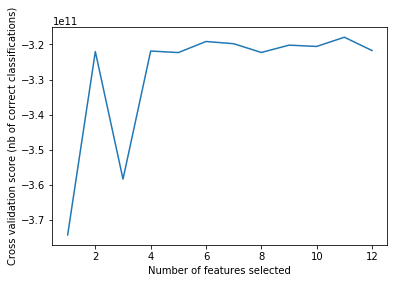

In [230]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [231]:
rfecv_df = pd.DataFrame()
rfecv_df['feature'] = X_train.columns
rfecv_df['ranking'] = rfecv.ranking_
rfecv_df.sort_values(by='ranking').head(12)

,feature,ranking
0,mileage,1
1,timestamp_year,1
2,mileage_per_year,1
3,age,1
4,score2,1
5,location_Other City,1
6,location_กรุงเทพมหานคร,1
7,car_type_รถ MPV / SUV,1
8,car_type_รถกระบะ,1
10,car_type_รถอื่น ๆ,1
